# Kshtij Raut 
Music Recomendation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
mbers = pd.read_csv('members.csv')
mbers.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
mbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
mbers.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
mbers.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
songs = pd.read_csv('songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [ ]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [ ]:
sng_exta = pd.read_csv('song_extra_info.csv')
sng_exta.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
sng_exta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [ ]:
sng_exta.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1734,207


In [ ]:
sng_exta.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292254 entries, 0 to 5292253
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              float64
dtypes: float64(1), object(5)
memory usage: 242.3+ MB


In [ ]:
train.describe()

,target
count,5.292253e+06
mean,5.404241e-01
std,4.983633e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [ ]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      18148
source_screen_name    283237
source_type            15238
target                     1
dtype: int64

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [ ]:
test.describe()

,id
count,2.556790e+06
mean,1.278394e+06
std,7.380818e+05
min,0.000000e+00
25%,6.391972e+05
50%,1.278394e+06
75%,1.917592e+06
max,2.556789e+06


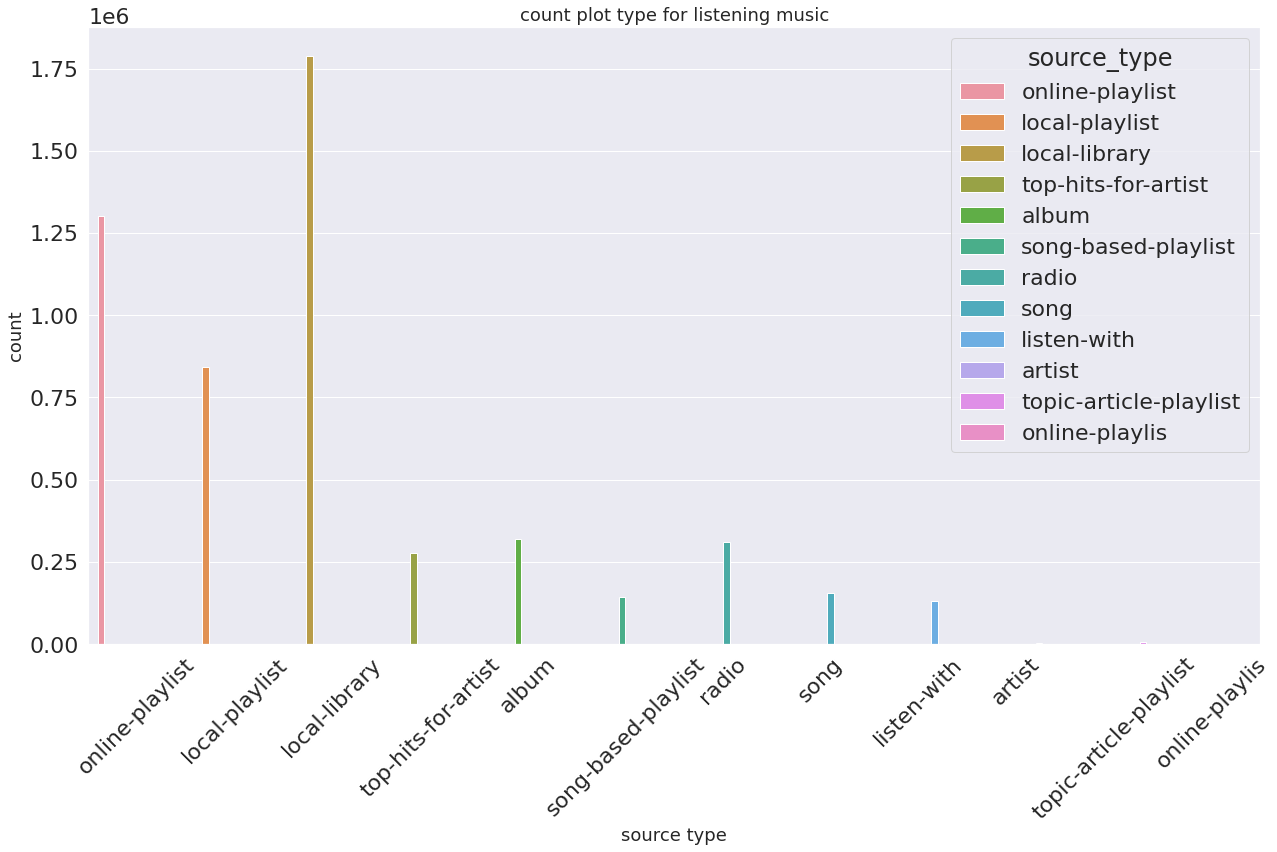

In [ ]:
plt.figure(figsize=(18,12))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style='darkgrid')
plt.xlabel('source type',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation='45')
plt.title('count plot type for listening music',fontsize=18)
plt.tight_layout()

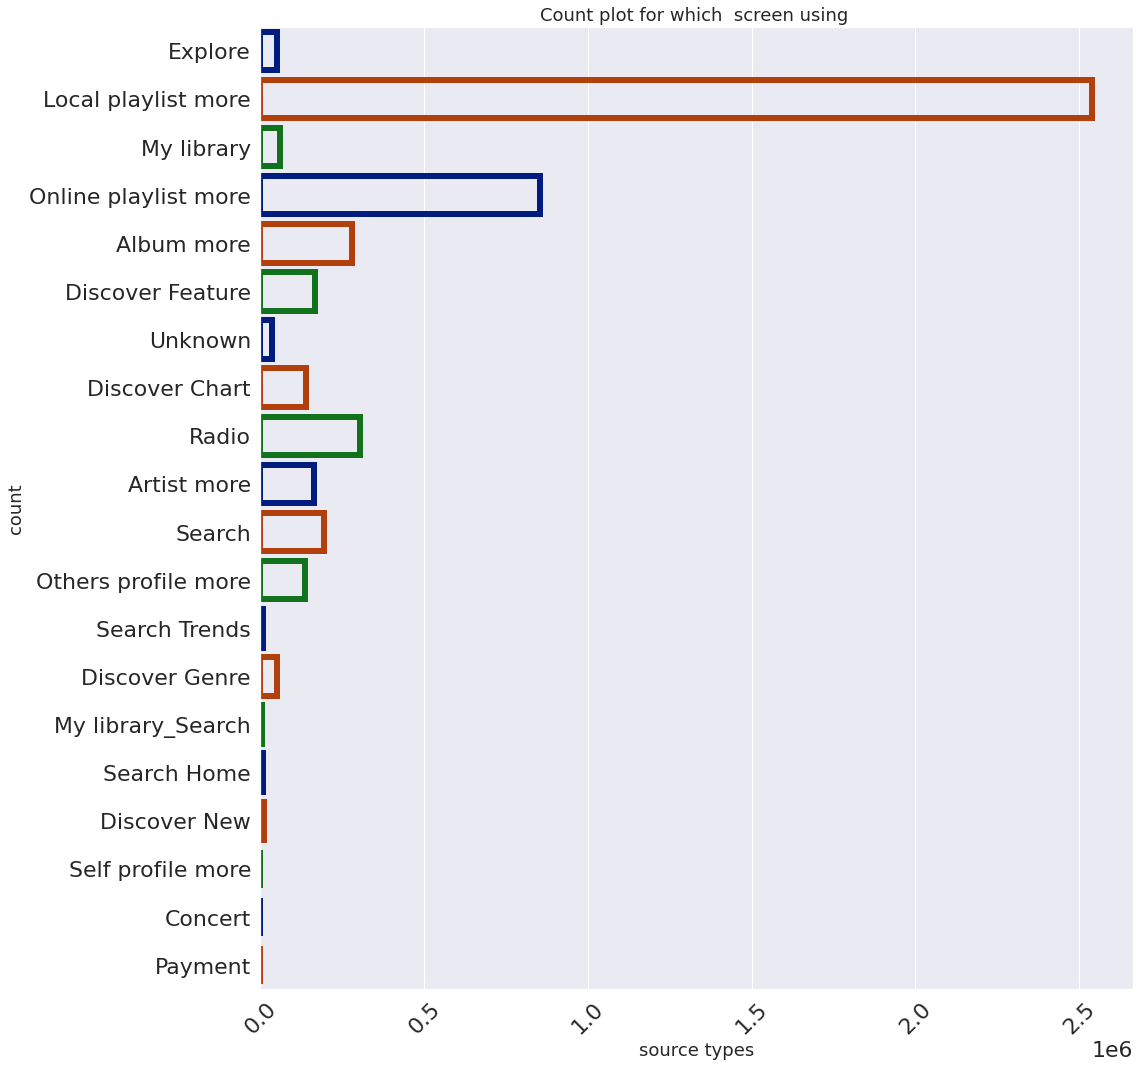

In [ ]:
plt.figure(figsize=(16,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=6,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=18)
plt.tight_layout()

In [ ]:
def count_plot(data, x, hue , type):
  plt.figure(figsize=(15,10))
  sns.set(font_scale=2)
  sns.countplot(x = x, hue= hue, data= data)
  plt.xlabel(x,fontsize=18)
  plt.ylabel('count',fontsize=18)
  plt.xticks(rotation = '90')
  plt.title('count plot for {0} in {1} data'.format(x,type),fontsize=18)
  plt.tight_layout()    

In [ ]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 18)
  plt.ylabel('count', fontsize = 18)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 18)
  plt.tight_layout()

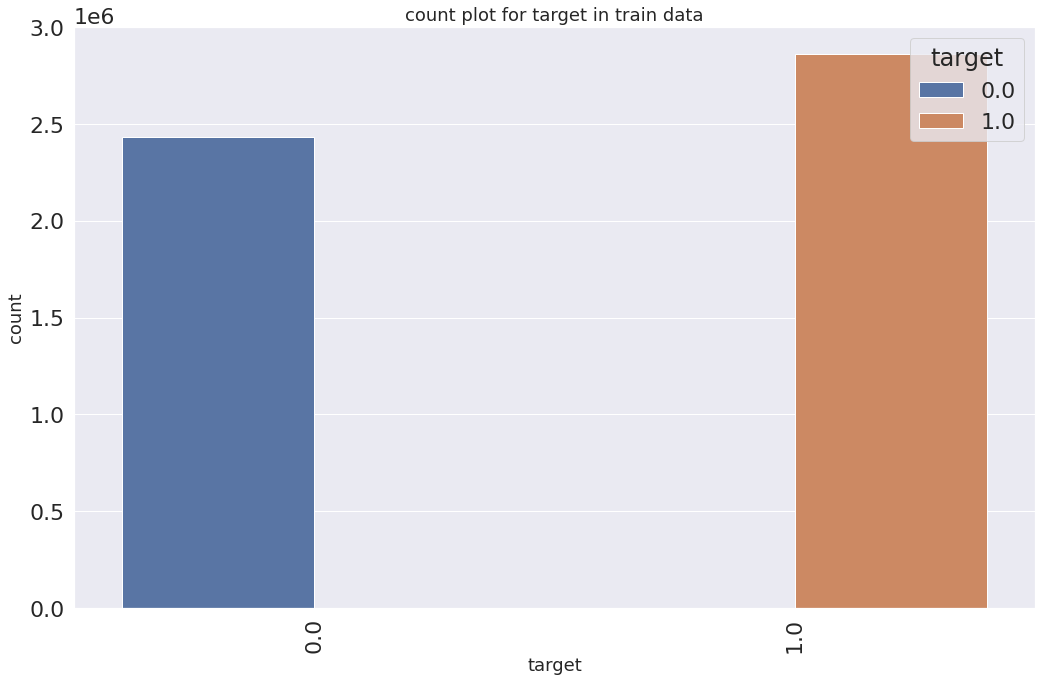

In [ ]:
count_plot(train,'target','target','train')

In [ ]:
print('Data for label 1: {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0]*100))
print('Data for label 0: {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0]*100))

Data for label 1: 45.9576%
Data for label 0: 54.0424%


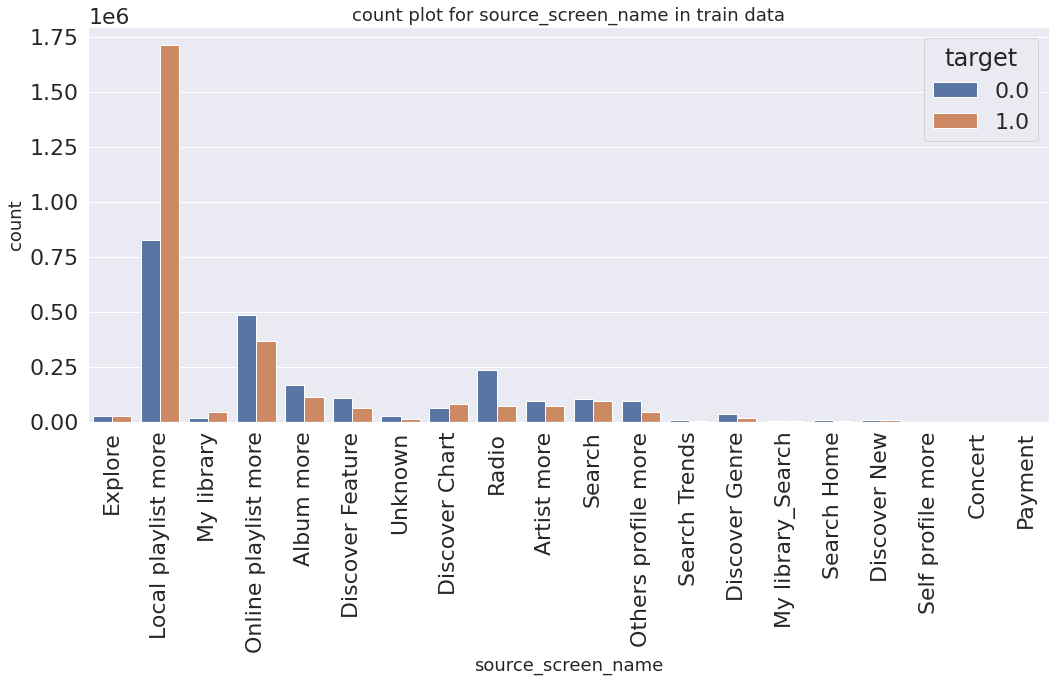

In [ ]:
count_plot(train,'source_screen_name','target','train')

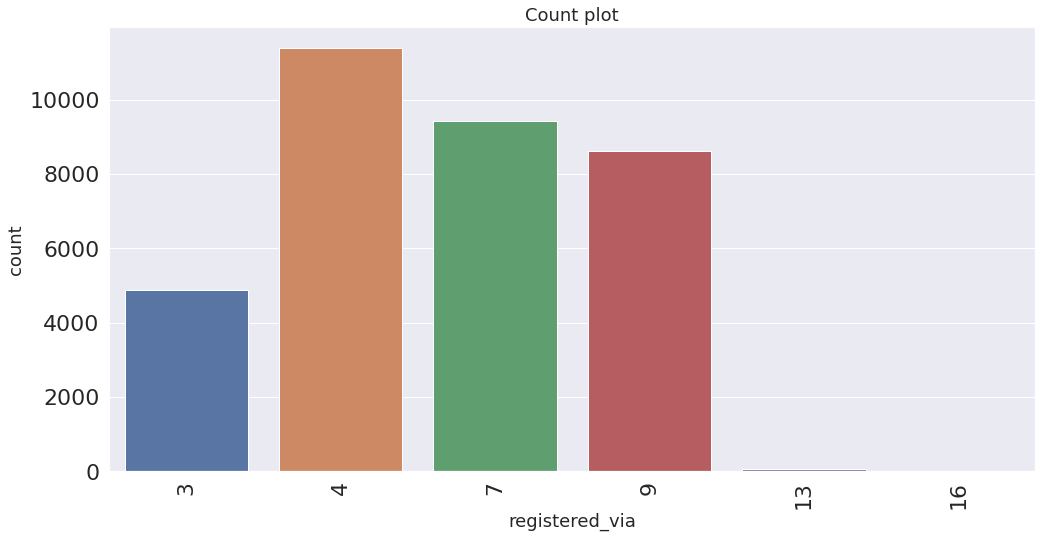

In [ ]:
count_plot_function(mbers,'registered_via') 

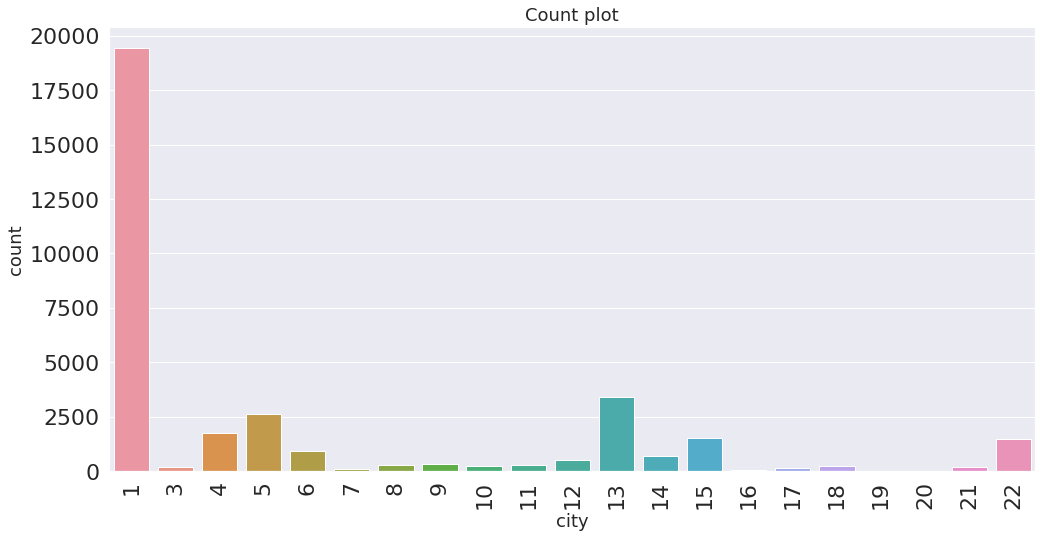

In [ ]:
count_plot_function(mbers,'city')

Text(0.5, 1.0, 'PDF for registration')

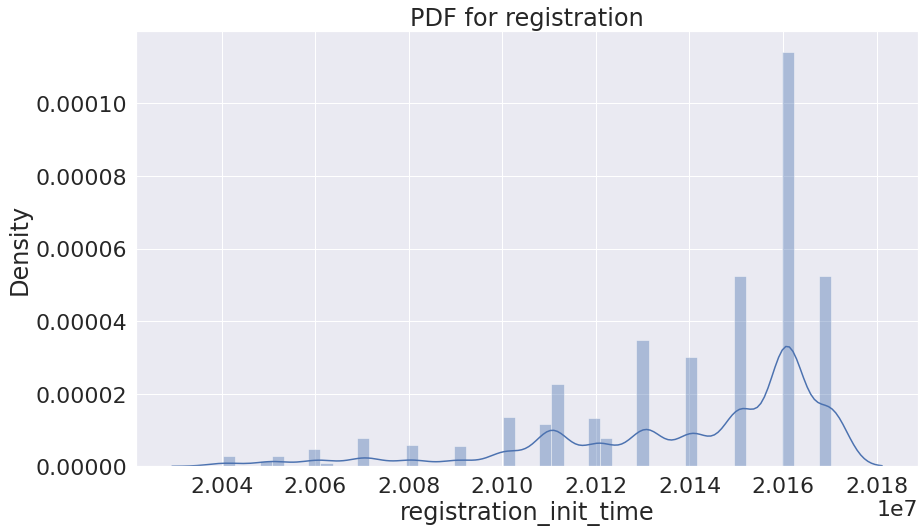

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(mbers.registration_init_time)
sns.set(font_scale=2)
plt.title('PDF for registration')

In [ ]:
def plot_pdf_cdf(x,flag):
  plt.figure(figsize=(10,6))
  kwargs= {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws= kwargs, kde_kws= kwargs)
    plt.title('CDF for age')
  else:
    sns.distplot(x)
    plt.title('PDF for age')
  sns.set(font_scale=2)

<Figure size 1008x576 with 0 Axes>

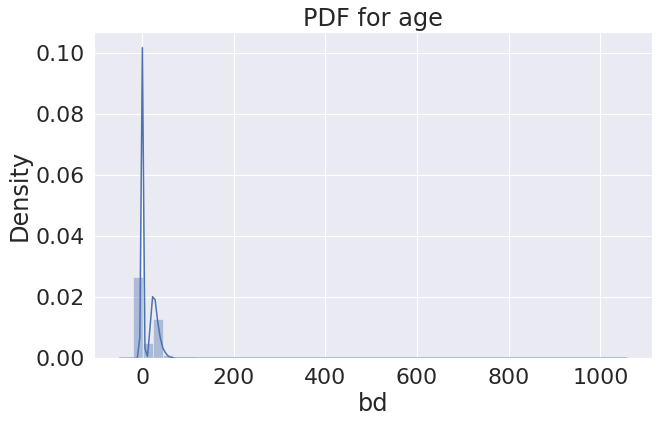

In [ ]:
plt.figure(figsize=(14,8))
plot_pdf_cdf(mbers['bd'],False)

<Figure size 1008x576 with 0 Axes>

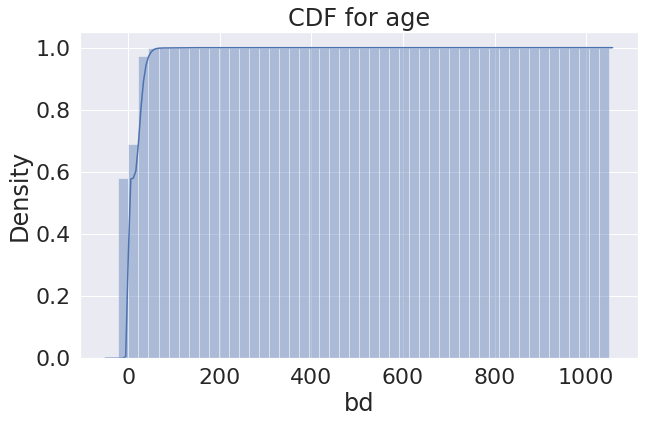

In [ ]:
plt.figure(figsize=(14,8))
plot_pdf_cdf(mbers['bd'],True)
plt.show()

In [ ]:
np.percentile(mbers['bd'].values,98)

47.0

In [ ]:
songs_all_info = songs.merge(sng_exta, on='song_id')

In [ ]:
def isrc_to_year(isrc):
  if type(isrc) == str:
    if int(isrc[5:7]) > 17:
      return 1900 + int(isrc[5:7])
    else:
      return 2000 + int(isrc[5:7])
  else:
    return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [ ]:
songs_all_info['language'].unique()

array([ 3., 31., 52., 17., 10., -1., 24., 59., 45., 38., nan])

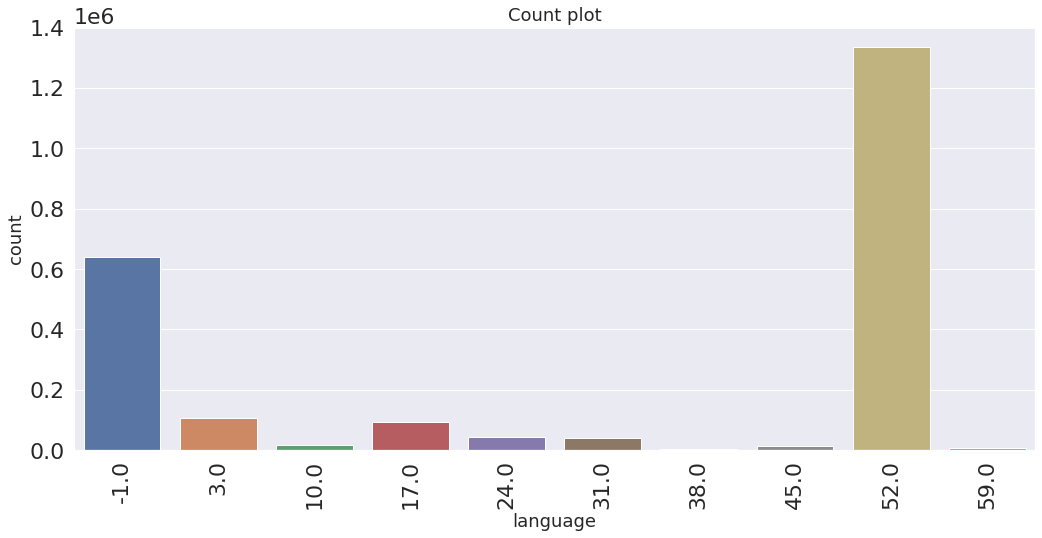

In [ ]:
count_plot_function(songs_all_info,'language')

In [ ]:
def check_missing_values(df):                 
  
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    total = df.shape[0]
    percentage = nan_count/total * 100
    print(col, 'has {:.2f}% missing values'.format(percentage))

In [ ]:
print('*******Missing values analysis for train data******** \n')
check_missing_values(train)

*******Missing values analysis for train data******** 

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.35% missing values
source_type has 0.29% missing values
target has 0.00% missing values


In [ ]:
print('*******Missing values analysis for memebrs data*******\n')
check_missing_values(mbers)

*******Missing values analysis for memebrs data*******

msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [ ]:
print('******Missing values analysis for songs data*****\n')
check_missing_values(songs)

******Missing values analysis for songs data*****

song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values


In [ ]:
print('*****Missing values analysis for songs_all_info data******\n')
check_missing_values(songs_all_info)

*****Missing values analysis for songs_all_info data******

song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values
name has 0.00% missing values
isrc has 5.95% missing values
song_year has 5.95% missing values


In [ ]:
train_members = pd.merge(train, mbers, on='msno', how='left')
train_merged = pd.merge(train_members, songs_all_info, on='song_id', how='left')

test_members = pd.merge(test, mbers, on='msno', how='left')
test_merged = pd.merge(test_members, songs_all_info, on='song_id', how='left')

In [ ]:
del train_members
del test_members

In [ ]:
check_missing_values(train_merged)

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.35% missing values
source_type has 0.29% missing values
target has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 39.68% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values
song_length has 0.02% missing values
genre_ids has 1.56% missing values
artist_name has 0.02% missing values
composer has 22.56% missing values
lyricist has 42.67% missing values
language has 0.02% missing values
name has 0.02% missing values
isrc has 7.77% missing values
song_year has 7.77% missing values


In [ ]:
members = pd.read_csv('members.csv')
songs = pd.read_csv('songs.csv')
songs_extra = pd.read_csv('song_extra_info.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
tr_index = train.shape[0] * 8 // 10

In [ ]:
train_data = train.iloc[:tr_index]
val_data = train.iloc[tr_index:]
print(train_data.shape, val_data.shape, test.shape)

(4233803, 6) (1058451, 6) (2556790, 6)


In [ ]:
# merge with members
train_members = pd.merge(train_data, mbers, on='msno', how='left')
val_members = pd.merge(val_data, mbers, on='msno', how='left')
test_members = pd.merge(test, mbers, on='msno', how='left')

In [ ]:
# merge songs and songs_extra
songs_all = pd.merge(songs, songs_extra, on='song_id', how='left')

In [ ]:
# merge with members
train_all = pd.merge(train_members, songs_all, on='song_id', how='left')
val_all = pd.merge(val_members, songs_all, on='song_id', how='left')
test_all = pd.merge(test_members, songs_all, on='song_id', how='left')

In [ ]:
del train_members
del val_members
del test_members
del songs_all
del train_data
del val_data
del train, test

In [ ]:
def filter_age(x):
  # 98th percentile is 47

  if x >= 0 and x <= 75:
    return x
  else:
    return np.nan

train_all['bd'] = train_all['bd'].apply(filter_age)
val_all['bd'] = val_all['bd'].apply(filter_age)
test_all['bd'] = test_all['bd'].apply(filter_age)

In [ ]:
# Function to extract features like day, month, year from dates.

def extract_date_fatures(data):

  # convert into date format
  data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')
  data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
  
  # get membership period from registration and expiration dates
  data['membership_days'] = data['expiration_date'].subtract(data['registration_init_time']).dt.days.astype(int)

  # extract year, month and day from dates
  data['registration_year'] = data['registration_init_time'].dt.year
  data['registration_month'] = data['registration_init_time'].dt.month
  data['registration_day'] = data['registration_init_time'].dt.day

  data['expiration_year'] = data['expiration_date'].dt.year
  data['expiration_month'] = data['expiration_date'].dt.month
  data['expiration_day'] = data['expiration_date'].dt.day

  return data

train_all = extract_date_fatures(train_all)
val_all = extract_date_fatures(val_all)
test_all = extract_date_fatures(test_all)

In [ ]:
train_all.tail(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,name,isrc,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
4233798,Kgd/ZGidRZIRdwtfDC8M/dvOaVEyvB4TdHb3W6wXFtI=,QjRlzbxmVxusW6CP2Xr8GjX3BnPitUMFBxCWxd/5AKY=,my library,Local playlist more,local-playlist,1.0,13,21.0,female,9,...,52.0,Payphone,USUM71203347,2363,2011,5,3,2017,10,21
4233799,n3q/1dSAs4NpDhxHPb2R1WjxaAyASXFHjTXQIAtXMm4=,j45X3ybi3MU49C3ClbSiV4yUKuC1RLJRfdQI/AIr6uA=,discover,Discover Feature,online-playlist,0.0,9,0.0,NaN,7,...,3.0,小薇,TWA450272403,2534,2010,10,29,2017,10,6
4233800,n3q/1dSAs4NpDhxHPb2R1WjxaAyASXFHjTXQIAtXMm4=,m2EIFRLw/qsdUEYdhCOCRoQJFz3ZHN+uxSaf29MezoU=,discover,Discover Feature,online-playlist,0.0,9,0.0,NaN,7,...,3.0,陪著我的時候想著她,TWA211125901,2534,2010,10,29,2017,10,6
4233801,7VzSlva0ZIQfLa6DeqKQ+A8aI7Ym5QITfE/WWxzwfzc=,+ChF0l3KHku79/g9kCPjueP4IdaJNTQC9QrbKRC/MDY=,my library,Local playlist more,local-library,0.0,13,27.0,male,9,...,3.0,超跑女神,TWK971101211,1553,2013,6,26,2017,9,26
4233802,/JzBmukxqe9h+wdXkd5q4XXyyBZdCVe9VR7zHVxAyMU=,fEAIgFRWmhXmo6m3ukQeqRksZCcO/7CjkqNckRHiVQo=,search,Search,song,1.0,12,22.0,female,3,...,3.0,皇后區的皇后,TWUM71600104,1482,2013,9,14,2017,10,5


In [ ]:
# Filling missing values
def filling_missing_values(data):
  data['source_system_tab'].fillna('no_system_tab', inplace=True)
  data['source_screen_name'].fillna('no_screen_name', inplace=True)
  data['source_type'].fillna('np_source_type', inplace=True)
  data['bd'].fillna(0, inplace=True)
  data['gender'].fillna('gender_missing', inplace=True)
  data['song_length'].fillna(0, inplace=True)
  data['genre_ids'].fillna(0, inplace=True)
  data['lyricist'].fillna('no_lyricist', inplace=True)
  data['artist_name'].fillna('no_artist_name', inplace=True)
  data['composer'].fillna('no_composer', inplace=True)
  data['language'].fillna('no_language', inplace=True)
  data['name'].fillna('no_name', inplace=True)
  return data

train_all = filling_missing_values(train_all)
val_all = filling_missing_values(val_all)
test_all = filling_missing_values(test_all)

In [ ]:
# Function to sepearate each genre_id and count total number of genre_ids.

def generate_genre_ids(data):

  genre_ids_matrix = np.zeros((data.shape[0], 4))

  for i in range(data.shape[0]):
    ids = str(data['genre_ids'].values[i]).split('|')
    if len(ids) > 2:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
        genre_ids_matrix[i, 2] = (ids[2])
    elif len(ids) > 1:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
    elif len(ids) == 1:
        genre_ids_matrix[i, 0] = (ids[0])
    genre_ids_matrix[i, 3] = len(ids)

  data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
  data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
  data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
  data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids
  return data

In [ ]:
train_all = generate_genre_ids(train_all)
val_all = generate_genre_ids(val_all)
test_all = generate_genre_ids(test_all)

In [ ]:
train_all = train_all.drop(['composer', 'lyricist'], axis=1)
val_all = val_all.drop(['composer', 'lyricist'], axis=1)
test_all = test_all.drop(['composer', 'lyricist'], axis=1)

In [ ]:
# Function to check 'feat' in artist field.
def calculate_is_featured(data):
  data['is_featured'] = data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
  return data


train_all = calculate_is_featured(train_all)
val_all = calculate_is_featured(val_all)
test_all = calculate_is_featured(test_all)

In [ ]:
# Function to count total number of artists for each song.

def artist_count(x):
  return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

# Function to extract first artist name from more than one artists.

def get_first_artist(x):
  if x.count('and') > 0:
    x = x.split('and')[0]
  if x.count(',') > 0:
    x = x.split(',')[0]
  if x.count(' feat') > 0:
    x = x.split(' feat')[0]
  if x.count('&') > 0:
    x = x.split('&')[0]
  return x.strip()

In [ ]:
# Function to execute above both functions.

def calculate_artist_features(data):

  # get artist count 
  data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
  # get first artist name
  data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
  return data

In [ ]:
train_all = calculate_artist_features(train_all)
val_all = calculate_artist_features(val_all)
test_all = calculate_artist_features(test_all)

In [ ]:
# songs_extra file has feature like 'isrc' which is International Standard Recording Code. 
# For each song its isrc is unique which contains information like countr_code, registraion_code, year of reference and designation code.
#Function to extract features from isrc.

def calcualte_songs_features(data):

  isrc = data['isrc']
  data['country_code'] = isrc.str.slice(0, 2)
  data['registration_code'] = isrc.str.slice(2, 5)
  data['song_year'] = isrc.str.slice(5, 7).astype(float)
  data['song_year'] = data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
  data['isrc_missing'] = (data['country_code'] == 0) * 1.0
  return data

train_all = calcualte_songs_features(train_all)
val_all = calcualte_songs_features(val_all)
test_all = calcualte_songs_features(test_all)

In [ ]:
# Function to fill missing isrc values.

def filling_missing_isrc_values(data):
  data['isrc'].fillna('no_isrc', inplace=True)
  data['country_code'].fillna('no_country_code', inplace=True)
  data['registration_code'].fillna('no_registration_code', inplace=True)
  data['song_year'].fillna('no_song_year', inplace=True)
  return data

train_all = filling_missing_isrc_values(train_all)
val_all = filling_missing_isrc_values(val_all)
test_all = filling_missing_isrc_values(test_all)

In [ ]:
train_all = train_all.drop(['genre_ids', 'artist_name','isrc', 'registration_init_time', 'expiration_date'], axis=1)
val_all = val_all.drop(['genre_ids', 'artist_name' ,'isrc', 'registration_init_time', 'expiration_date'], axis=1)
test_all = test_all.drop(['genre_ids', 'artist_name','isrc', 'registration_init_time', 'expiration_date'], axis=1)

In [ ]:
# Function to calculate group by features on dataframe.

def calculate_groupby_features(data):
  
  # song count for each user
  member_song_count = data.groupby('msno').count()['song_id'].to_dict()
  data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

  # song count for each artist
  artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
  data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])

  # song count for each genre_id
  first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
  data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

  # song count for each lanugage
  lang_song_count = data.groupby('language').count()['song_id'].to_dict()
  data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

  # user count for each song
  song_member_count = data.groupby('song_id').count()['msno'].to_dict()
  data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[x])

  # We can add group by  wrt 'age'
  age_song_count = data.groupby('bd').count()['song_id'].to_dict()
  data['age_song_count'] = data['bd'].apply(lambda x: age_song_count[x])
 
  return data


train_all = calculate_groupby_features(train_all)
val_all = calculate_groupby_features(val_all)
test_all = calculate_groupby_features(test_all)

In [ ]:
print(val_all, test_all)


                                                 msno  \
0        XO4VdQLxGqRl/n0HJY6hpzKEqnaNwO6KzWGhdr4fAgM=   
1        XO4VdQLxGqRl/n0HJY6hpzKEqnaNwO6KzWGhdr4fAgM=   
2        XO4VdQLxGqRl/n0HJY6hpzKEqnaNwO6KzWGhdr4fAgM=   
3        XO4VdQLxGqRl/n0HJY6hpzKEqnaNwO6KzWGhdr4fAgM=   
4        4I3Pj3ogyd9RY0czfUOmI1pVgBbuoPXDRtbK9tsrRX0=   
...                                               ...   
1058446  NSPzIkFBYy5MfXbqGUffONOy4i3gB4I0kLnSeUiTETM=   
1058447  rqMJyocVwiIT8Ed8CRpAu8+29YNSeTAHl7Q83D9I4ME=   
1058448  rqMJyocVwiIT8Ed8CRpAu8+29YNSeTAHl7Q83D9I4ME=   
1058449  rqMJyocVwiIT8Ed8CRpAu8+29YNSeTAHl7Q83D9I4ME=   
1058450  rqMJyocVwiIT8Ed8CRpAu8+29YNSeTAHl7Q83D9I4ME=   

                                              song_id source_system_tab  \
0        cVHsClcaUfj3ZPoqihH1Rd6ZSaDpa6UbdMDcyx8FfVU=          discover   
1        r5BnHxvuPlLjwr4MHf3dF3yUY+NVS6rHrkVG7wVZ1uE=          discover   
2        un97bVjGL490RQbl8kr/58qbzkeuFBGMnXFRst9RArs=          discover   
3        XUz4Z4